In [27]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('C:\\Users\\Vikas Bhardwaj\\Desktop\\DATA SCIENCE\\Datasets\\Datasets')
print(os.getcwd())

C:\Users\Vikas Bhardwaj\Desktop\DATA SCIENCE\Datasets\Datasets


In [28]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [29]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [30]:
X_train = [] #60 prev stock prices before the financial day
				# this is the ip to the RNN
y_train = []  # will contain the stock price the next fin day
		

In [31]:
# since v need 60 prev days to start predicting frm 61st day v r starting at 60 ie 61
for i in range(60, 1258): # upper bound is last row, lower bound is i-60
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)
print("#********************")
print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
#********************
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [32]:
print(X_train.shape[0])

print(X_train.shape[1])

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)


1198
60
[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [33]:
# Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()


In [34]:
#  Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
# 1 is the dimension of the op layer
# ie 1 neruon

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [35]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
# regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)
# every 32 stock prices back prop is going to happn


W0722 11:24:17.932688 17400 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 11:24:18.847415 17400 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0722 11:24:18.859421 17400 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0722 11:24:20.115703 17400 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_d

Epoch 1/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0455
Epoch 2/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0057
Epoch 3/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0047
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0037
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 8/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0041
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0037
Epoch 10/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0041
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0036
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - 

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016


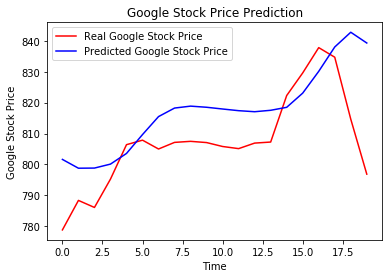

In [36]:
# Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()